In [1]:
import tensorflow as tf
from tensorflow import keras

Building an Image Classifier Using the Sequential API

In [2]:
#Load the Fashion MNIST dataset using Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
#Creation of a validation dataset and scalling input features since we are training the neural network using gradient descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
#Creating the model using the Sequential API
#Here is a classification MLP with twi hidden layers:
model = keras.models.Sequential() 
#Creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially.

model.add(keras.layers.Flatten(input_shape=[28,28]))
#Build the first later and add it to the model. It is a Flatten layer which converts each input image into a 1D array

model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
#Add a dense hidden alyer with 300 and then another with 100 neurons. It will use the ReLu activation function. 
# Each dense layer manages its own weight matrix, containing all connection weights between neurons and their inputs. 
# It also manages a vector is bias terms (one per neuron)


model.add(keras.layers.Dense(10, activation='softmax'))
#We add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

In [8]:
#The model’s summary() method displays all the model’s layers,14 including each layer’s
# name (which is automatically generated unless you set it when creating the layer), its
# output shape (None means the batch size can be anything), and its number of parameters.
# The summary ends with the total number of parameters, including trainable and
# non-trainable parameters.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Getting a model's list of layers
model.layers

In [10]:
# Accessing parameters of a layer
weights, biases = model.layers[1].get_weights()

In [11]:
weights

array([[ 0.00358796, -0.01579984, -0.02071251, ..., -0.02761066,
        -0.05381456,  0.03531928],
       [ 0.00543976,  0.04201626,  0.05893902, ...,  0.0077502 ,
         0.06004767,  0.01407225],
       [-0.06249965,  0.02912328,  0.07405664, ..., -0.02891192,
        -0.06309637, -0.03317367],
       ...,
       [ 0.07082155,  0.06803554, -0.02533868, ..., -0.06471402,
        -0.06769563,  0.03582118],
       [-0.05548152, -0.04341821,  0.0679678 , ...,  0.00740609,
        -0.0742301 ,  0.07436533],
       [-0.04570477, -0.03802432, -0.07001379, ..., -0.05821884,
         0.07335509,  0.04885755]], dtype=float32)

In [12]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
# Compiling the model
model.compile(
    loss='sparse_categorical_crossentropy', #this is because we have sparse labels and the classes are exclusive.
    optimizer='sgd', #we will train the model using Stochastic Gradient Descent. Keras will perform the backpropagation algorithm.
    metrics=['accuracy'] #since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.
)

In [14]:
#Training and Evaluating the model
history = model.fit(
    X_train, y_train, 
    epochs=30, # we pass the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution).
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7225 - accuracy: 0.7619 - val_loss: 0.5096 - val_accuracy: 0.8308
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4870 - accuracy: 0.8298 - val_loss: 0.4525 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8437 - val_loss: 0.4412 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4141 - accuracy: 0.8547 - val_loss: 0.3970 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3950 - accuracy: 0.8608 - val_loss: 0.3788 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3796 - accuracy: 0.8647 - val_loss: 0.3685 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3661 - accuracy: 0.8703 - val_loss: 0.3617 - val_accuracy:

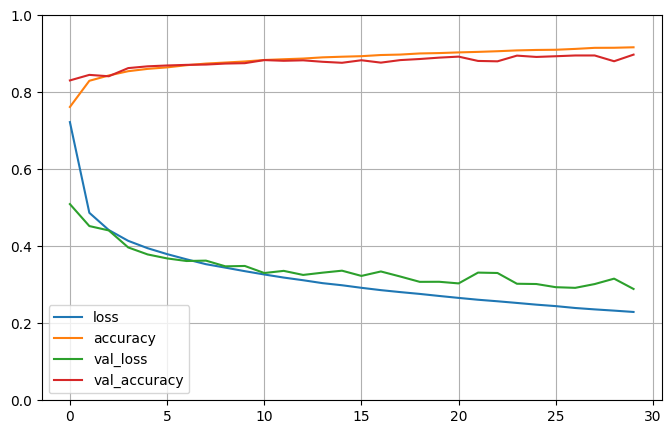

In [15]:
# Plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
#Evaluation on the Test
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.4704 - accuracy: 0.8410


[66.47038269042969, 0.8410000205039978]

In [24]:
#Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)